In [12]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn')
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
args = ['lr','eph','sub','roi']

In [18]:
f = []
for subj, roi in itertools.product(subj_list, roi_list):
    file_name = os.path.join(results_dir, f'loss-history_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    f.append(os.path.join(results_dir, file_name))
df = tuning.load_history_files(f, *args)

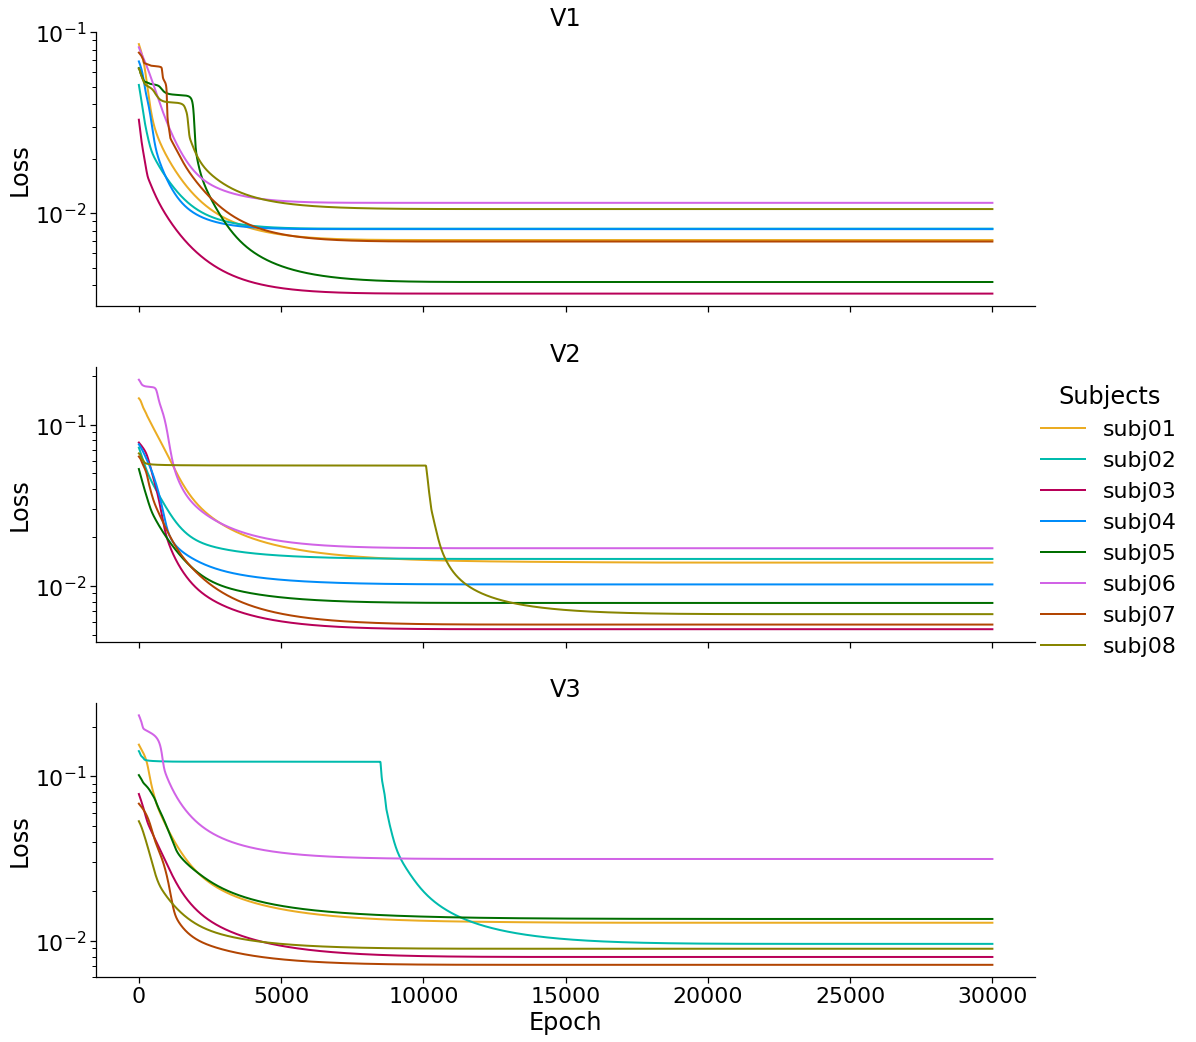

In [26]:
vis.plot_loss_history(df, hue='sub', lgd_title='Subjects', hue_order=subj_list,
                      col='vroinames', log_y=True,
                      **{'palette': utils.subject_color_palettes(dset, subj_list)})

In [27]:
f = []
for subj, roi in itertools.product(subj_list, roi_list):
    file_name = os.path.join(results_dir, f'model-history_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.h5')
    f.append(os.path.join(results_dir, file_name))
model_df = tuning.load_history_files(f, *args)

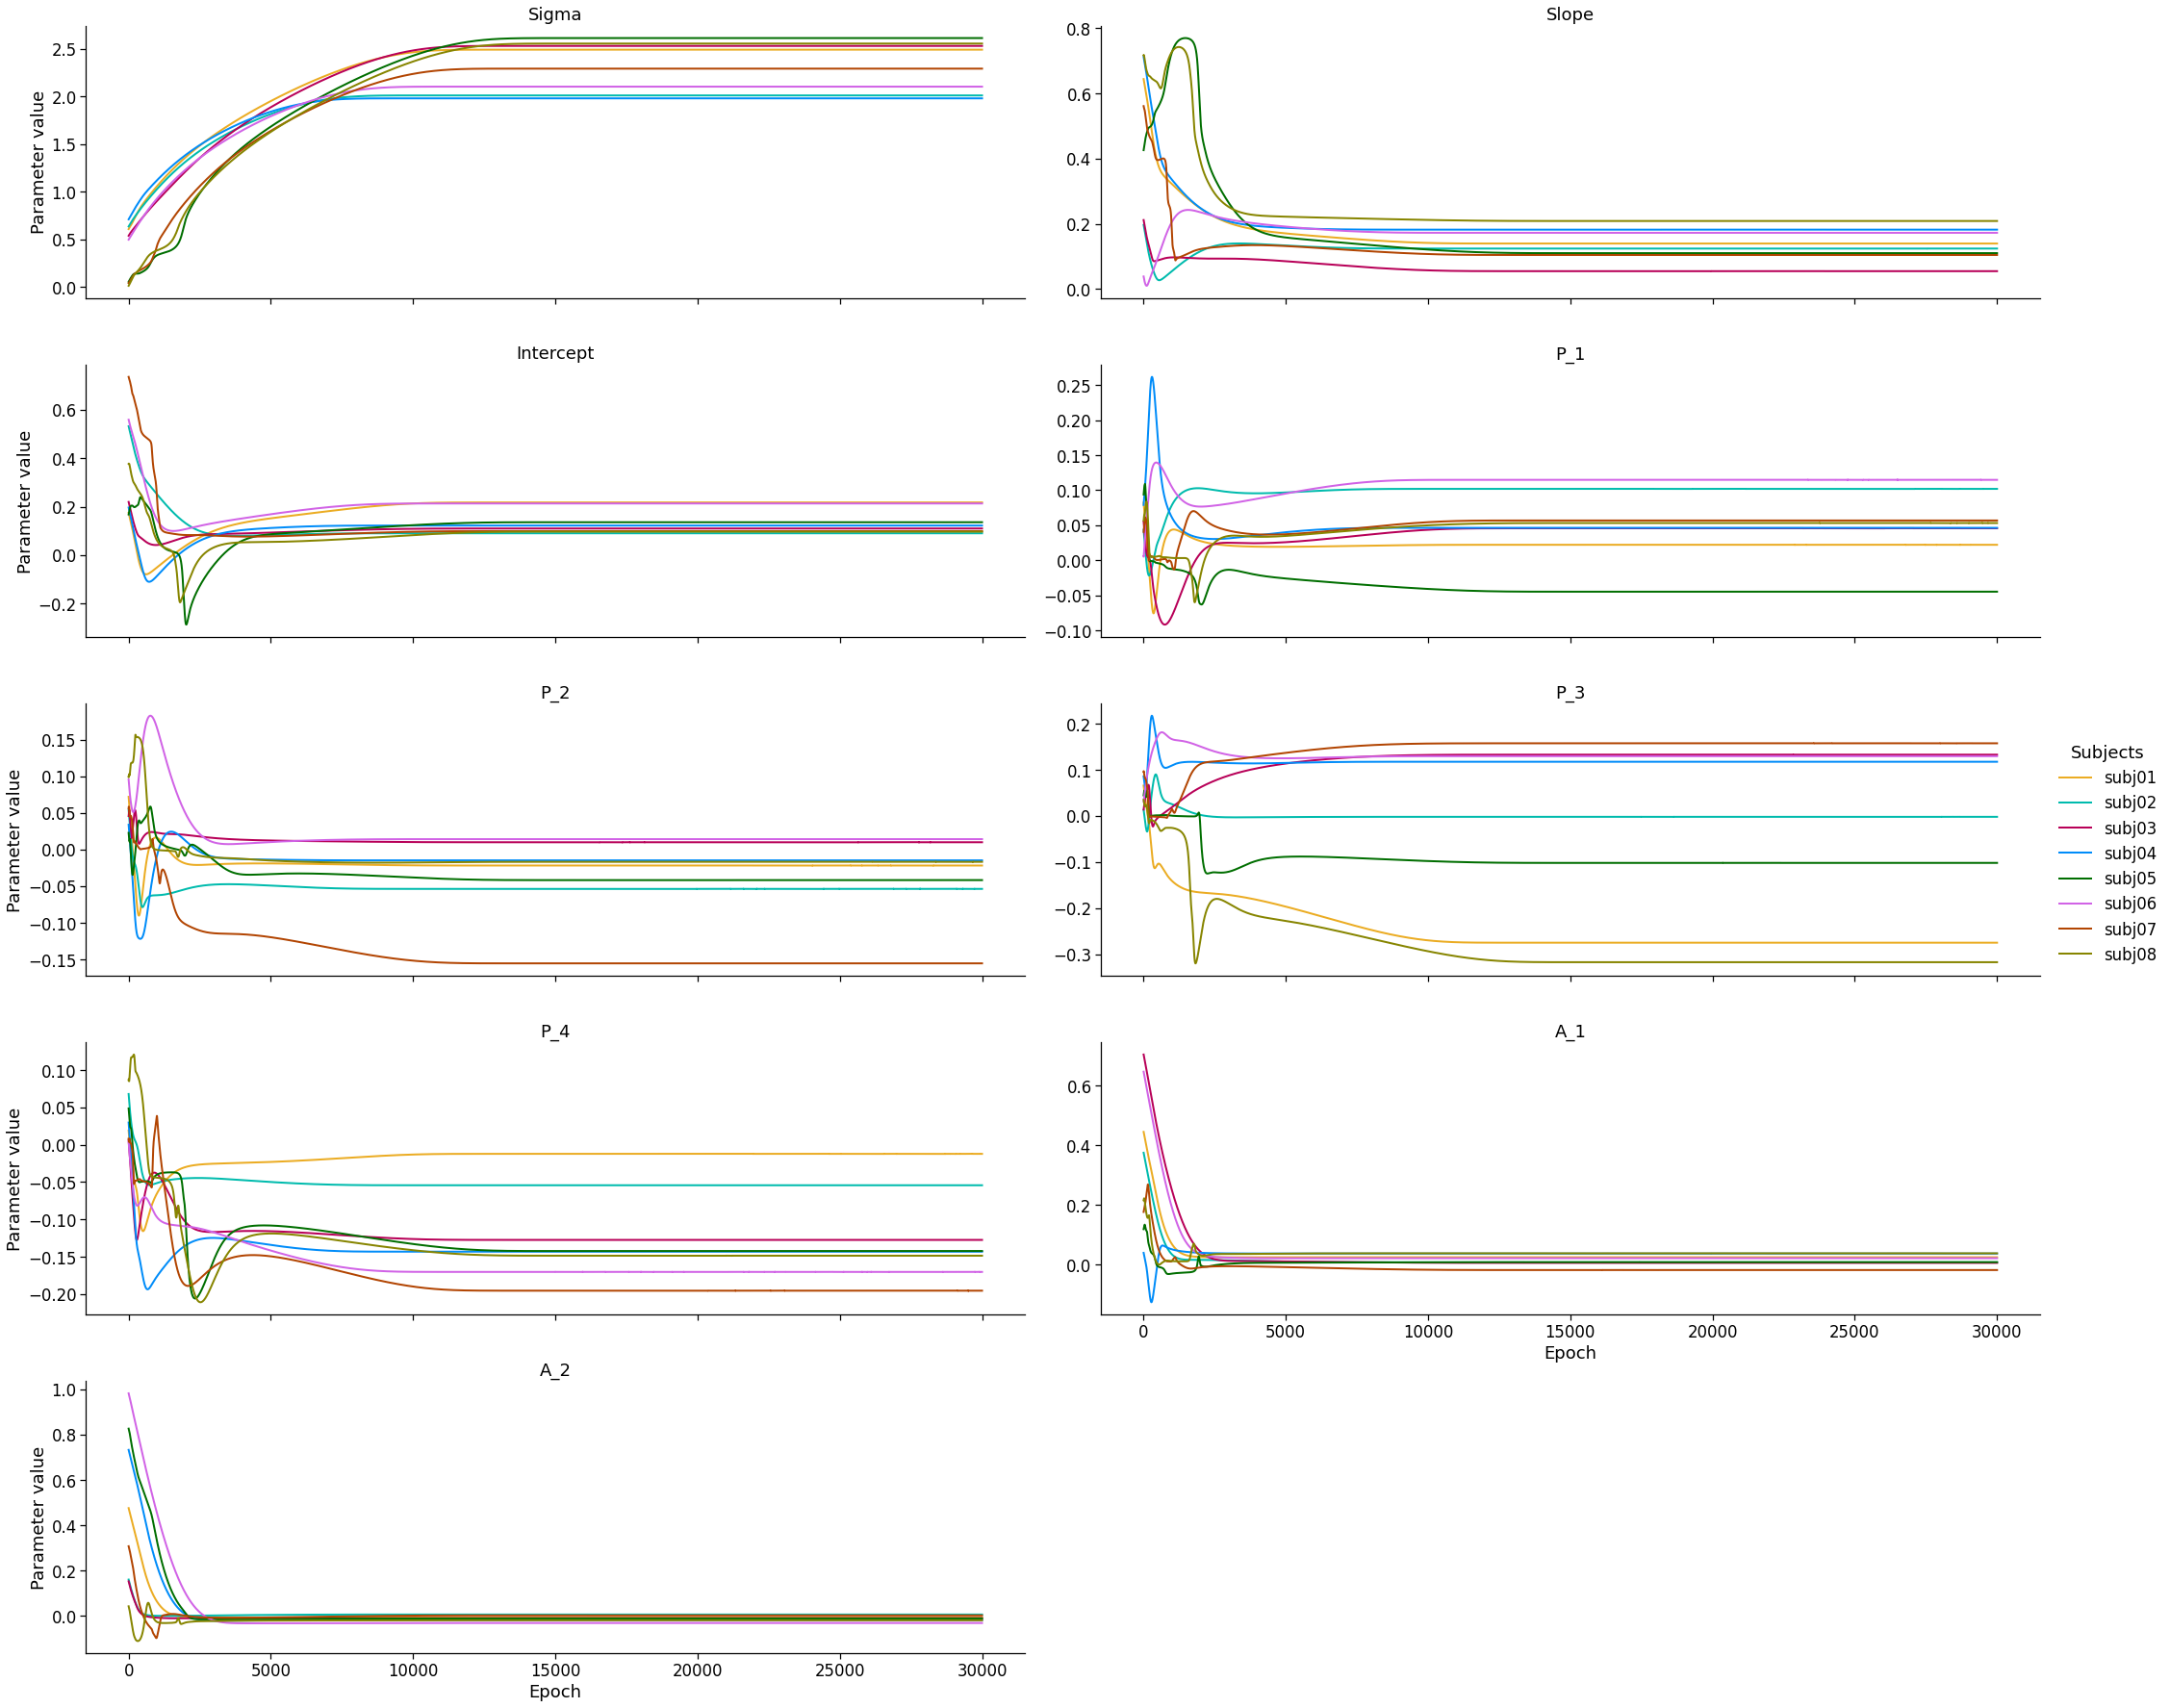

In [31]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
vis.plot_param_history(model_df.query('vroinames == "V1"'), params_list, group,
                       hue='sub', lgd_title='Subjects', hue_order=subj_list,
                       log_y=False,
                       **{'palette': utils.subject_color_palettes(dset, subj_list)})